# Pricipal Component Analysis from scratch on MNIST dataset

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
X = np.load("dataset/X_train.npy")
y = np.load("dataset/y_train.npy")

## Mean of each category of image, mean of each number

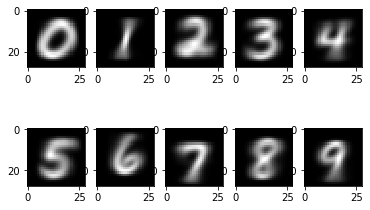

In [3]:
for i in range(10):
    digit = np.mean(X[y == i], axis = 0)
    digit = digit.reshape(28,28)
    plt.subplot(2, 5, i+1)
    plt.imshow(digit, cmap = "gray")

## Mean image for the entire dataset

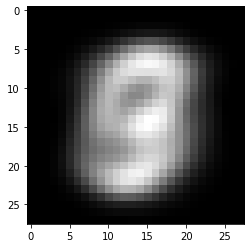

In [4]:
mean = np.mean(X, axis = 0)
mean_img = np.array(mean).reshape(28,28)
plt.imshow(mean_img, cmap='gray')
plt.show()

## Find eigen values, eigen vectors

### Here the plot also tells that most information is contained in the first 150 dimmensions

No handles with labels found to put in legend.
/home/aj/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


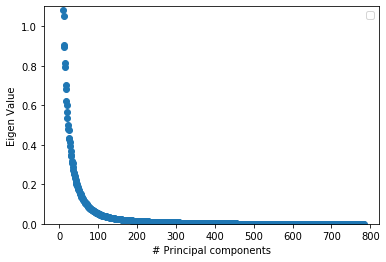

<Figure size 432x288 with 0 Axes>

In [5]:
X_std = (X - mean)
cov_mat = np.cov(X_std, rowvar = 0)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eigen_values_sorted = np.argsort(-eig_vals)
plt.ylabel('Eigen Value')
plt.xlabel('# Principal components')
plt.ylim(0, 1.1)
plt.legend(loc = 'best')
plt.scatter(range(eig_vals.shape[0]),eig_vals[eigen_values_sorted])
plt.figure()
plt.tight_layout()
plt.show()

## Project each class on the first 5 principal components, and view the overlap

In [6]:
def plot_mnist_pca(X_pca, y):
    markers = 's','x','o','.',',','<','>', '^','8','*'
    colors = list(plt.rcParams['axes.prop_cycle'])
    target = np.unique(y)
    print(list(zip(target,markers)))
    for idx, (t, m) in enumerate(zip(target, markers)):
        subset = X_pca[y == t]
        plt.scatter(subset[:, 0], subset[:, 1], s = 50,c = colors[idx]['color'], label = t, marker = m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc = 'lower left')
    plt.tight_layout()
    plt.figure()
    plt.show()

[(0, 's'), (1, 'x'), (2, 'o'), (3, '.'), (4, ','), (5, '<'), (6, '>'), (7, '^'), (8, '8'), (9, '*')]


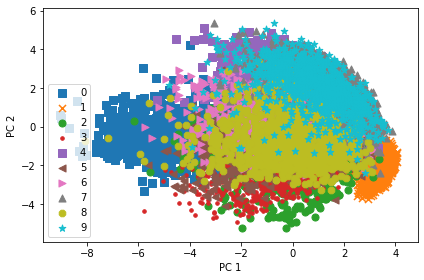

<Figure size 432x288 with 0 Axes>

(784, 5)


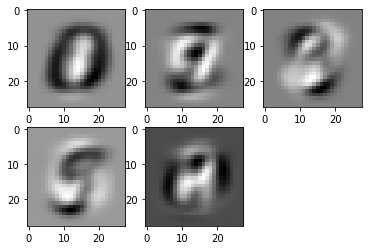

In [7]:
X_std_pca = X_std.dot(eig_vecs[:,eigen_values_sorted[:2]])
plot_mnist_pca(X_std_pca, y)
print(eig_vecs[:,eigen_values_sorted[:5]].shape)
for i in range(5):
    reshape = eig_vecs[:,eigen_values_sorted[i]].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(reshape.real, cmap = "gray")